# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [8]:
print(btc_url)

https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json


In [9]:
import json

In [10]:
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [11]:
btc_json = btc_data.json()
eth_json = eth_data.json()

In [12]:
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18828818,
            "total_supply": 18828818,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41302.0,
                    "volume_24h": 30894843487,
                    "market_cap": 782657709221,
                    "percentage_change_1h": -0.671291981526218,
                    "percentage_change_24h": -4.0261750998316,
                    "percentage_change_7d": -3.79794997705762,
                    "percent_change_1h": -0.671291981526218,
                    "percent_change_24h": -4.0261750998316,
                    "percent_change_7d": -3.79794997705762
                }
            },
            "last_updated": 1632848381
        }
    },
    "metadata": {
        "timestamp": 1632848381,
        "num_cry

In [13]:
# Fetch current BTC price
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49562.40
The current value of your 5.3 ETH is $15010.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [16]:
type(alpaca)

alpaca_trade_api.rest.REST

In [17]:
# Format current date as ISO format
today = pd.Timestamp.now(tz="America/Phoenix").round(freq='D').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = pd.Timestamp("2021-09-23", tz="America/Phoenix").isoformat(),
    end = pd.Timestamp("2021-09-23", tz="America/Phoenix").isoformat(),
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-23 00:00:00-04:00  115.93  115.94  115.57  115.57  7516613  439.84   

                                                            
                             high    low   close    volume  
time                                                        
2021-09-23 00:00:00-04:00  444.89  439.6  443.13  67408294

In [18]:
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-09-23 00:00:00-04:00  115.93  115.94  115.57  115.57  7516613  439.84   

                                                            
                             high    low   close    volume  
time                                                        
2021-09-23 00:00:00-04:00  444.89  439.6  443.13  67408294

In [19]:
df_portfolio_agg = df_portfolio["AGG"]["close"][0]
df_portfolio_agg.dtype
df_portfolio_spy = df_portfolio["SPY"]["close"][0]
df_portfolio_spy

443.13

In [20]:
df_portfolio.shape

(1, 10)

In [21]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
agg_close = float(df_portfolio["AGG"]["close"])
spy_close = float(df_portfolio["SPY"]["close"])
spy_close_series = df_portfolio["SPY"]["close"]
#Sandeep -- help understanding why when this is cast as float it returns a value

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")
spy_close_series

Current AGG closing price: $115.57
Current SPY closing price: $443.13


time
2021-09-23 00:00:00-04:00    443.13
Name: close, dtype: float64

In [22]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = (my_btc_value + my_eth_value)
shares = (my_spy_value + my_agg_value)
holdings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(holdings, columns = ['amount'], index=["crypto", "shares"])
#df_savings.rename(columns={'0': 'amount'}, inplace=True)

# Display savings DataFrame
display(df_savings)
#display(holdings)

,amount
crypto,64573.06
shares,45270.50


In [24]:
df_savings.shape

(2, 1)

<AxesSubplot:ylabel='amount'>

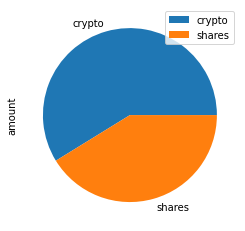

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 6

# Calculate total amount of savings
total_savings = (my_agg_value + my_spy_value + crypto)
#print(emergency_fund)
#print(total_savings)
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You've built up an adequate savings to handle financial emergencies!")
elif total_savings == emergency_fund:
    print("Your emergency savings goal has been met.")
else:  
    print("Your first priority should be to set aside at least six months worth of income in an emergency fund.")


Congratulations! You've built up an adequate savings to handle financial emergencies!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_mkt_port = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data
MC_mkt_port.portfolio_data.tail()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.22  416.8111  417.64   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.48   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.35   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.98   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.30   

                                                  
                             volume daily_return  
time                                              
2021-04-26 00:00:00-04:00  44689009     0.002208  
2021-04-27 00:00:00-04:00  45962264    -0.000383  
2021-04-28 00:00:00-04:00  45533863    -0.000311  
2021-04-29 00:00:00-04:00  70595229     0.006302  
2021-04-30 00:00:00-04:00  73129109    -0.006381

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_mkt_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999576,0.988337,0.980063,1.000656,0.993013,1.008028,1.001966,1.023040,1.008156,0.997968,...,0.992148,1.009769,0.994631,1.000014,0.998612,1.027943,1.010717,1.003579,1.007579,1.007620
2,0.999727,0.986308,0.978522,0.996450,0.998262,0.985728,1.010291,1.023616,1.007535,1.001185,...,0.982898,1.028589,0.999635,1.007950,0.998447,1.033294,1.016648,1.004696,1.005218,0.998136
3,0.998429,0.985079,0.989858,0.988622,0.989321,0.990243,0.999061,1.018351,1.007535,1.010591,...,0.964745,1.023373,1.009146,0.997787,0.997948,1.037704,1.021502,1.003411,1.002403,0.996693
4,1.021138,0.998794,1.001771,0.996285,0.995344,0.992831,1.003477,1.015717,1.016499,1.007763,...,0.960800,1.012024,1.013135,0.990424,1.008417,1.044642,1.018303,1.013067,0.999113,0.997051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.685630,33.992690,15.980740,18.798638,35.776343,18.307830,34.828110,8.818592,53.555400,28.646271,...,14.455928,6.524861,25.742179,17.523303,19.205189,17.397502,16.343366,22.928966,26.246715,17.359820
7557,10.675989,34.167147,15.981870,18.589175,35.900935,18.498138,35.280720,8.813119,53.634692,28.261610,...,14.405828,6.542930,25.291587,17.466930,19.083099,17.313169,16.428735,22.893790,26.122451,17.748318
7558,10.760020,34.230878,16.189429,18.716205,35.683174,18.430137,34.741207,8.936006,53.449649,27.968645,...,14.516838,6.549845,25.452199,17.388543,19.012950,17.391195,16.175655,22.877076,26.292905,17.592103
7559,10.704297,34.497833,16.182243,18.754209,36.163335,18.548682,34.347500,8.908417,53.345184,27.950877,...,14.426449,6.543259,25.724750,17.258900,19.176434,17.326389,16.108977,22.754821,25.921050,17.513460


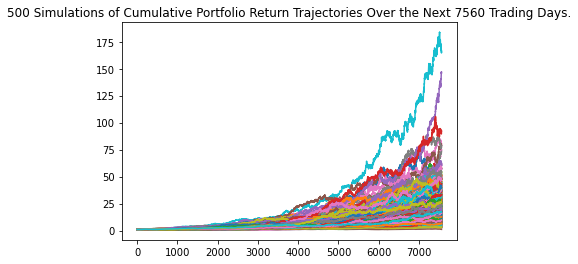

In [32]:
# Plot simulation outcomes
mkt_port_line_plot = MC_mkt_port.plot_simulation()

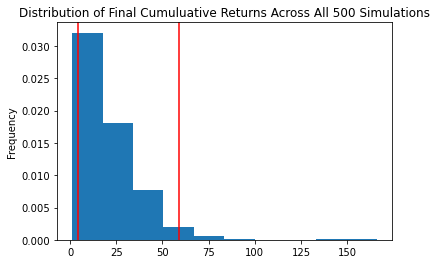

In [33]:
# Plot probability distribution and confidence intervals
mkt_port_dist_plot = MC_mkt_port.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mkt_port_stats_tbl = MC_mkt_port.summarize_cumulative_return()

# Print summary statistics
print(mkt_port_stats_tbl)

count           500.000000
mean             21.687275
std              16.815881
min               1.132896
25%              10.944401
50%              16.857744
75%              28.397789
max             165.793272
95% CI Lower      4.203976
95% CI Upper     59.036313
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
mkt_port_stats_tbl[8]

4.203976427615815

In [36]:
mkt_port_stats_tbl[9]

59.036312755499466

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
mkt_port_lower_proj = round(mkt_port_stats_tbl[8]*initial_investment,2)
mkt_port_upper_proj = round(mkt_port_stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of:\n"
      f" ${mkt_port_lower_proj} and ${mkt_port_upper_proj}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of:
 $84079.53 and $1180726.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [39]:
# Set initial investment
initial_investment_halfagain = round(20000 * 1.5,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
mkt_port_half_again_lower_proj = round(mkt_port_stats_tbl[8]*initial_investment_halfagain,2)
mkt_port_half_again_upper_proj = round(mkt_port_stats_tbl[9]*initial_investment_halfagain,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_halfagain} in the portfolio"
      f" over the next 30 years will end within in the range of:\n"
      f" ${mkt_port_half_again_lower_proj} and ${mkt_port_half_again_upper_proj}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of:
 $126119.29 and $1771089.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_eighty_twenty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2, .8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [41]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_eighty_twenty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007665,1.011782,1.007101,1.013337,0.989003,0.989768,1.013544,0.997753,0.997843,0.998075,...,1.000868,0.993321,0.991927,0.993179,0.995629,1.000856,1.010665,1.002111,0.982229,1.012676
2,1.008791,1.017276,1.021257,1.016839,0.979007,0.991270,1.009270,0.998294,0.989347,1.009861,...,0.998157,0.987750,1.006628,0.997861,0.993811,1.001795,1.004233,1.009120,0.992694,1.010880
3,0.997761,1.032269,1.016026,1.014436,0.975084,1.003364,1.019791,1.006189,0.976540,1.035841,...,1.004838,0.975106,1.001016,0.980654,0.992682,1.004151,0.987883,1.007232,0.985653,1.010065
4,0.999959,1.037150,1.011256,1.016517,0.967550,1.008620,1.028360,0.991578,0.975742,1.040520,...,1.009516,0.987098,1.003464,0.966275,1.006158,0.994174,0.960524,1.014936,0.997846,1.009238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.515966,1.218825,3.060398,1.961093,2.231936,1.642463,1.680993,1.712433,2.549124,1.569353,...,1.594905,1.080921,1.663350,0.898934,1.151170,2.755080,1.755808,2.010580,1.835556,1.458552
1257,1.514626,1.203950,3.034566,1.966573,2.226362,1.641149,1.695156,1.735686,2.542349,1.560655,...,1.593929,1.070084,1.654428,0.911755,1.135785,2.751149,1.762328,2.008663,1.796205,1.472670
1258,1.530069,1.226529,3.006040,1.987564,2.235173,1.655673,1.723479,1.757163,2.533576,1.576614,...,1.580027,1.078983,1.685659,0.918337,1.120856,2.755670,1.780184,2.008401,1.786464,1.450990
1259,1.533045,1.232906,3.003435,1.977849,2.233554,1.602249,1.748970,1.752558,2.544891,1.550141,...,1.595989,1.092718,1.695676,0.911204,1.130219,2.755359,1.775486,1.999391,1.813256,1.423141


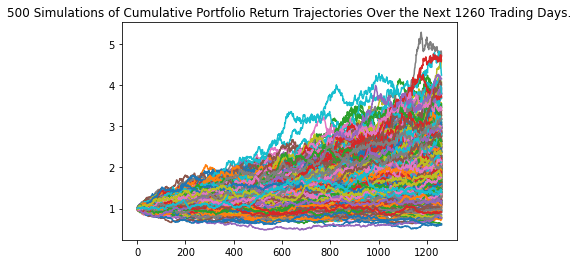

In [42]:
# Plot simulation outcomes
MC_eighty_twenty_line_plot = MC_eighty_twenty.plot_simulation()

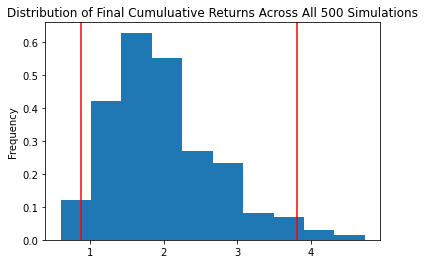

In [43]:
# Plot probability distribution and confidence intervals
MC_dist_plot = MC_eighty_twenty.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_eighty_twenty_stats_tbl = MC_eighty_twenty.summarize_cumulative_return()

# Print summary statistics
print(MC_eighty_twenty_stats_tbl)

count           500.000000
mean              1.991973
std               0.740724
min               0.599834
25%               1.471447
50%               1.859207
75%               2.388514
max               4.735215
95% CI Lower      0.883516
95% CI Upper      3.809301
Name: 1260, dtype: float64


In [45]:
MC_eighty_twenty_stats_tbl[8]

0.8835157440004321

In [47]:
# Set initial investment
eighty_twenty_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
eighty_twenty_lower_proj = round(MC_eighty_twenty_stats_tbl[8]*eighty_twenty_initial_investment,2)
eighty_twenty_upper_proj = round(MC_eighty_twenty_stats_tbl[9]*eighty_twenty_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${eighty_twenty_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of:\n"
      f" ${eighty_twenty_lower_proj} and ${eighty_twenty_upper_proj}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of:
 $53010.94 and $228558.08


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_seventy_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3, .7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_seventy_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997309,1.004837,0.999226,0.993455,1.006451,0.986713,1.007193,0.998842,0.999508,1.006956,...,0.997846,0.995295,1.006484,1.013303,1.006737,0.994234,1.004655,0.991096,0.995205,0.996070
2,0.981940,0.992065,1.006518,0.982896,1.008727,0.987697,1.003021,1.015820,0.997378,1.004703,...,1.003479,0.992763,1.009856,1.012595,0.998788,0.999079,0.999234,0.985671,1.018987,1.002567
3,0.981081,1.004464,0.996326,0.987641,1.017980,0.979514,1.007888,1.016168,0.994558,1.012228,...,1.006462,0.987630,1.016054,1.012849,1.003653,0.991542,1.012455,0.982187,1.009311,1.020180
4,0.982194,0.995471,1.001871,0.979516,1.021405,0.984695,1.003616,1.002000,1.000437,1.016198,...,1.008497,0.993914,1.012416,1.035953,0.991373,0.972319,1.011229,0.978050,1.005414,1.022616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.782533,1.822808,4.904858,4.077479,2.687896,3.857859,2.679756,4.208276,2.746293,3.180241,...,2.542961,1.413381,3.740238,4.216940,2.752138,2.671245,2.857541,4.132825,3.098614,4.462123
2517,2.763906,1.823946,4.908359,4.077007,2.681085,3.873148,2.674570,4.240223,2.767033,3.152150,...,2.491800,1.443835,3.711856,4.135910,2.729085,2.641020,2.853716,4.050037,3.083920,4.430746
2518,2.740001,1.831137,4.934121,4.105836,2.693802,3.880975,2.690546,4.222416,2.712485,3.126495,...,2.556019,1.451035,3.689785,4.161119,2.733292,2.617459,2.888313,4.070770,3.051209,4.413153
2519,2.765112,1.855269,4.903782,4.124011,2.673522,3.940748,2.684854,4.183952,2.763476,3.137567,...,2.569809,1.434314,3.668859,4.238287,2.732863,2.601014,2.891557,4.108233,3.038031,4.401236


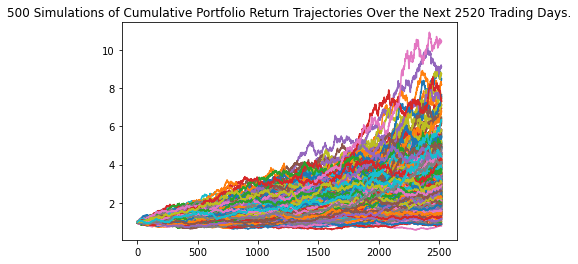

In [50]:
# Plot simulation outcomes
MC_seventy_thirty_line_plot = MC_seventy_thirty.plot_simulation()

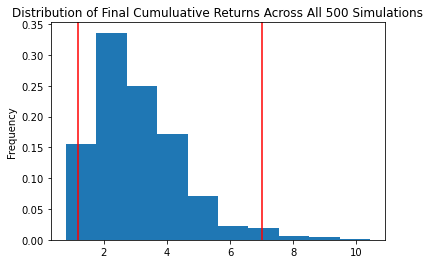

In [51]:
# Plot probability distribution and confidence intervals
MC_seventy_dist_plot = MC_seventy_thirty.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_seventy_thirty_stats_tbl = MC_seventy_thirty.summarize_cumulative_return()

# Print summary statistics
print(MC_seventy_thirty_stats_tbl)

count           500.000000
mean              3.099536
std               1.436205
min               0.799915
25%               2.022668
50%               2.800566
75%               3.882642
max              10.441518
95% CI Lower      1.190346
95% CI Upper      7.017105
Name: 2520, dtype: float64


In [53]:
# Set initial investment
seventy_thirty_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
seventy_thirty_lower_proj = round(MC_seventy_thirty_stats_tbl[8]*seventy_thirty_initial_investment,2)
seventy_thirty_upper_proj = round(MC_seventy_thirty_stats_tbl[9]*seventy_thirty_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${seventy_thirty_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of:\n"
      f" ${seventy_thirty_lower_proj} and ${seventy_thirty_upper_proj}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of:
 $71420.77 and $421026.27
